Import relevent libraries

In [2]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset - CHSI County level data for health risks and healthcare

In [3]:
risk = pd.read_csv('RISKFACTORSANDACCESSTOCARE.csv')

In [4]:
risk.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,0.0,0.0,0.0,0.0,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,0.0,0.0,0.0,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


Create subset containing relevant variables for our EDA

In [30]:
var_cor1 = risk[['Diabetes', 'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare', 'Prim_Care_Phys_Rate',
               'Dentist_Rate', 'Community_Health_Center_Ind']]

In [31]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
corrs=var_cor1.corr()
# Plotting Heatmap to know about Correlation
figure=ff.create_annotated_heatmap(z=corrs.values,x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000
iplot(figure)

In [32]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

Creating a pairwise scatterplot to find correlative/causative relationships

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



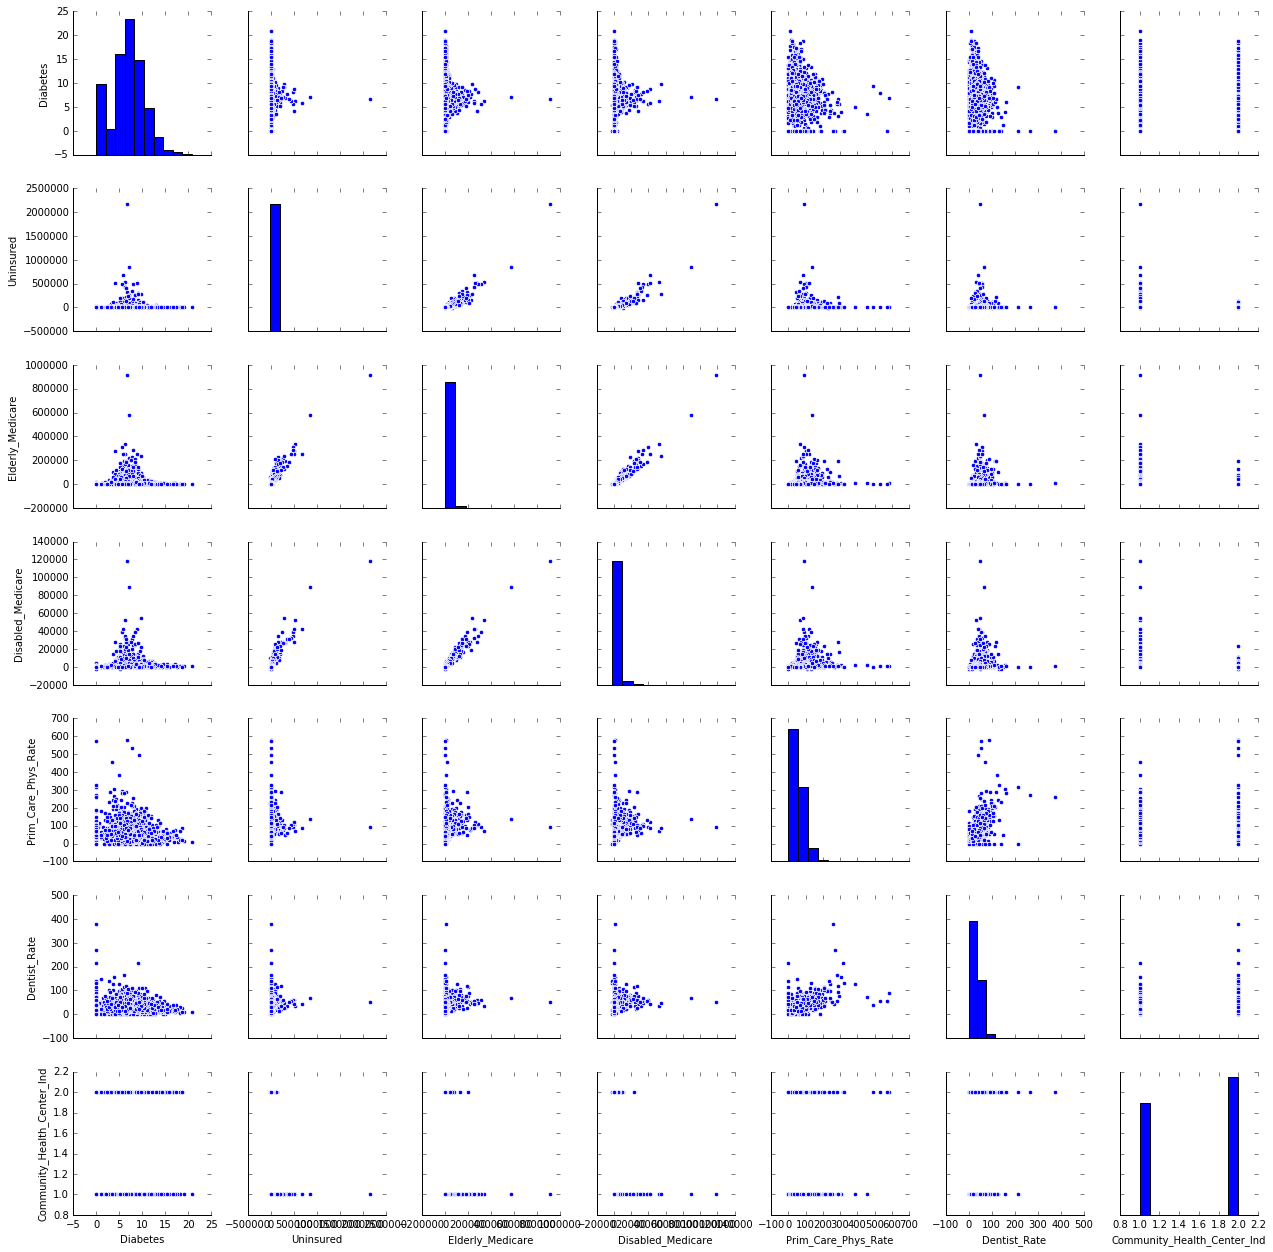

In [33]:
sns.pairplot(var_cor1, size=2.5);

Importing next dataset of interest - Google trends (Metropolitan Area Searches)

In [34]:
search = pd.read_csv("RegionalInterestByConditionOverTime.csv")


In [73]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import cufflinks as cf
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
init_notebook_mode(connected=True)

@interact
def scatter_plot(x=list(var_cor1.select_dtypes('number').columns), 
                 y=list(var_cor1.select_dtypes('number').columns)[1:]):
    

    dataPoints = go.Scattergl(
    x=x,
    y=y,
    mode='markers'
        
    )

    data=[dataPoints]

    figure = go.Figure(data=data, layout=layout)

    ply.iplot(figure)

interactive(children=(Dropdown(description='x', options=('Diabetes', 'Uninsured', 'Elderly_Medicare', 'Disable…

In [35]:
search.head(5)

,dma,geoCode,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
0,Portland-Auburn ME,500,44,6,17,39,21,31,14,29,...,81,70,37,83,64,56,76,66,47,80
1,New York NY,501,47,6,13,38,16,33,12,27,...,77,70,34,53,56,53,79,56,52,78
2,Binghamton NY,502,48,3,16,50,12,37,24,31,...,74,68,24,71,69,44,77,78,61,72
3,Macon GA,503,44,14,14,37,19,49,14,29,...,78,53,38,62,46,60,47,53,41,66
4,Philadelphia PA,504,52,7,16,41,23,36,14,30,...,80,75,35,61,62,75,84,69,56,78


Line graph to summarize the popular searches

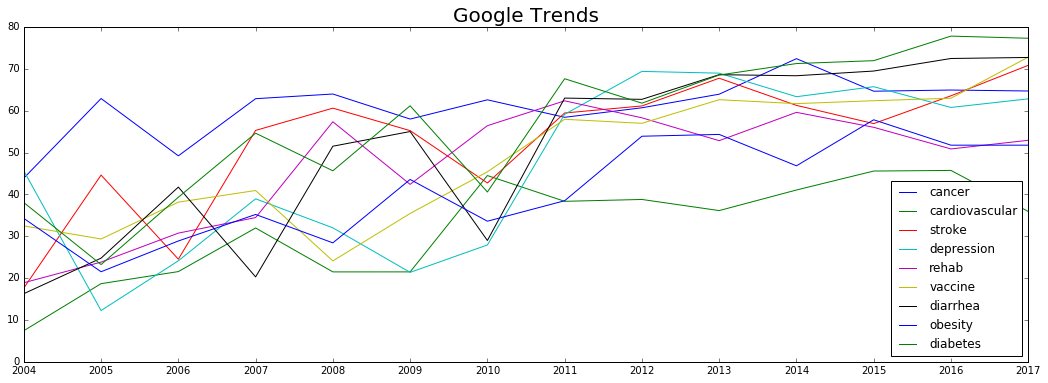

In [50]:
yearWiseMeam = {}
for col in search.columns:
    if '+' in col:
        year = col.split('+')[0]
        disease = col.split('+')[-1]
        if not disease in yearWiseMeam:
            yearWiseMeam[disease] = {}
        if not year in yearWiseMeam[disease]:
            yearWiseMeam[disease][year] = np.mean(list(search[col]))

plt.figure(figsize=(18, 6))
ax = plt.subplot(111)
plt.title("Google Trends", fontsize=20)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(list(yearWiseMeam['cancer'].keys()))
lh = {}

for disease in yearWiseMeam:
    lh[disease] = plt.plot(yearWiseMeam[disease].values())
plt.legend(lh, loc='best')

